In [9]:
import numpy as np
import xarray as xr
import pandas as pd 
import datetime 

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d
import matplotlib.dates as mdates

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [4]:
# make function 
# find index of value closest to desired value 
def find_nearest(desired, variable):
    diff = ([])
    for ll in variable:
        dd = np.absolute(desired - ll)
        diff.append(dd)
    ind = diff.index(min(diff))
    val = np.float(variable[ind])
    return ind

In [17]:
# load in contrast rf11 file 
# https://drive.google.com/file/d/1xVarpVV6Su5ophCqOpG14D4lHrF1xHBa/view?usp=sharing
myurl_start = 'https://docs.google.com/uc?export=download&id='

! wget -O contrast_file 'https://docs.google.com/uc?export=download&id=1xVarpVV6Su5ophCqOpG14D4lHrF1xHBa'

--2019-11-22 10:24:32--  https://docs.google.com/uc?export=download&id=1xVarpVV6Su5ophCqOpG14D4lHrF1xHBa
Resolving docs.google.com... 2607:f8b0:4006:818::200e, 172.217.3.110, 172.217.10.78, ...
Connecting to docs.google.com|2607:f8b0:4006:818::200e|:443... failed: Operation timed out.
Connecting to docs.google.com|172.217.3.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qeus1gmoobr5ikb8oqjm8i1rk4qvv0ce/1574431200000/10967756465562109017/*/1xVarpVV6Su5ophCqOpG14D4lHrF1xHBa?e=download [following]
--2019-11-22 10:25:48--  https://doc-08-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qeus1gmoobr5ikb8oqjm8i1rk4qvv0ce/1574431200000/10967756465562109017/*/1xVarpVV6Su5ophCqOpG14D4lHrF1xHBa?e=download
Resolving doc-08-3s-docs.googleusercontent.com... 2607:f8b0:4006:81a::2001, 172.217.12.129
Connecting to doc-08-3s-docs.googleus

In [156]:
# read in the file 
toga = xr.open_dataset('contrast_file')
toga



!!!! need to make data frame
handle fill values 

<xarray.Dataset>
Dimensions:                           (Time: 196)
Coordinates:
  * Time                              (Time) datetime64[ns] 2014-02-12T23:59:25 ... 2014-02-13T06:29:25
Data variables:
    Time_UTC                          (Time) datetime64[ns] ...
    FLT_HH                            (Time) timedelta64[ns] ...
    FLT_MM                            (Time) timedelta64[ns] ...
    FLT_SS                            (Time) timedelta64[ns] ...
    UTC_HH                            (Time) timedelta64[ns] ...
    UTC_MM                            (Time) timedelta64[ns] ...
    UTC_SS                            (Time) timedelta64[ns] ...
    GALT_A                            (Time) float32 ...
    GGALT                             (Time) float32 ...
    GGEOIDHT                          (Time) float32 ...
    GGLAT                             (Time) float32 ...
    GGLON                             (Time) float32 ...
    GGQUAL                            (Time) float32 ...
    

In [21]:
# load in small camchem rf11 file 
# https://drive.google.com/file/d/1XnQLD3iAt6ALa1D8P1GMZTmK1317ZPE8/view?usp=sharing
myurl_start = 'https://docs.google.com/uc?export=download&id='

! wget -O camchem_file 'https://docs.google.com/uc?export=download&id=1XnQLD3iAt6ALa1D8P1GMZTmK1317ZPE8'

--2019-11-22 10:45:53--  https://docs.google.com/uc?export=download&id=1XnQLD3iAt6ALa1D8P1GMZTmK1317ZPE8
Resolving docs.google.com... 2607:f8b0:4006:81a::200e, 172.217.3.110
Connecting to docs.google.com|2607:f8b0:4006:81a::200e|:443... failed: Operation timed out.
Connecting to docs.google.com|172.217.3.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/okavt0uodsr8skvuul5m3rfcsb279ck9/1574431200000/10967756465562109017/*/1XnQLD3iAt6ALa1D8P1GMZTmK1317ZPE8?e=download [following]
--2019-11-22 10:47:09--  https://doc-0k-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/okavt0uodsr8skvuul5m3rfcsb279ck9/1574431200000/10967756465562109017/*/1XnQLD3iAt6ALa1D8P1GMZTmK1317ZPE8?e=download
Resolving doc-0k-3s-docs.googleusercontent.com... 2607:f8b0:4006:812::2001, 172.217.11.1
Connecting to doc-0k-3s-docs.googleusercontent.com|2607:f8b

In [6]:
cam = xr.open_dataset('camchem_file')
cam

<xarray.Dataset>
Dimensions:  (lat: 32, lev: 56, lon: 25, time: 1)
Coordinates:
  * lon      (lon) float64 130.0 131.2 132.5 133.8 ... 156.2 157.5 158.8 160.0
  * lev      (lev) float64 1.868 2.353 2.948 3.677 ... 947.5 962.5 977.5 992.5
  * lat      (lat) float64 0.4712 1.414 2.356 3.298 ... 26.86 27.8 28.74 29.69
  * time     (time) object 2014-12-01 00:00:00
Data variables:
    DMS      (time, lev, lat, lon) float32 ...
    CHBR3    (time, lev, lat, lon) float32 ...
    NO2      (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             f.e11.TS1IREFC1SD.f09.f09.ccmi34.Aircraft_2014-2016.cy.001
    title:            UNSET
    logname:          dkin
    host:             r1i4n16
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade2/scratch2/dkin/f.e11.TS1IREFC1SD.f09.f09.ccmi34....
    topography_file:  /glade/p/acd/tilmes/inputdata/topo/USGS-gtopo30_0.9x1.2...

In [46]:
###################### CONTRAST DATA ######################

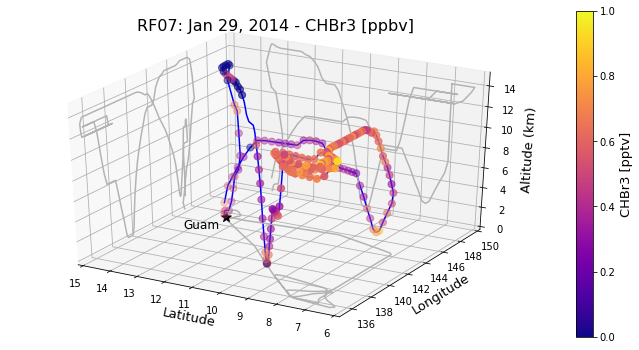

In [161]:
# figure 1 
# ozone (O3_ppbv) and water vapor (VMR_VXL) time series 
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection='3d')

# primary axis, O3 
ax.set_title('RF07: Jan 29, 2014 - CHBr3 [ppbv]', fontsize = 16)
a = ax.plot(toga.GGLAT, toga.GGLON, toga.GGALT/1000, c='b')
a = ax.scatter3D(toga.GGLAT, toga.GGLON, toga.GGALT/1000, c=toga.Bromoform, 
                 s = 50, cmap='plasma', vmin = 0, vmax = 1)
ax.set_xlabel('Latitude', fontsize = 13)
ax.set_xlim([15,6])
ax.set_ylabel('Longitude', fontsize = 13)
ax.set_ylim([135, 150])
ax.set_zlabel('Altitude (km)', fontsize = 13);
ax.set_zlim([0, 15])

# colorbar 
cbar = fig.colorbar(a)
cbar.set_label('CHBr3 [pptv]', fontsize = 13)

# add gray lines 
flat1 = np.zeros_like(toga.GGALT/1000)
ax.plot3D(toga.GGLAT, toga.GGLON, flat1, c=[0.7, 0.7, 0.7])
flat2 = np.full_like(toga.GGLAT, 15)
ax.plot3D(flat2, toga.GGLON, toga.GGALT/1000, c=[0.7, 0.7, 0.7])
flat3 = np.full_like(toga.GGLON, 150)
ax.plot(toga.GGLAT, flat3, toga.GGALT/1000, c=[0.7, 0.7, 0.7])

# add guam 
ax.scatter(13.4, 144.8, marker = '*', color = 'k', s = 100)
ax.text(14, 142, 0, s='Guam', fontsize=12)

# save 
fig.savefig("RF07_FIG1.pdf", bbox_inches='tight')

In [ ]:
###################### CAMCHEM DATA ######################

Text(147.7, 11.4, 'Guam')

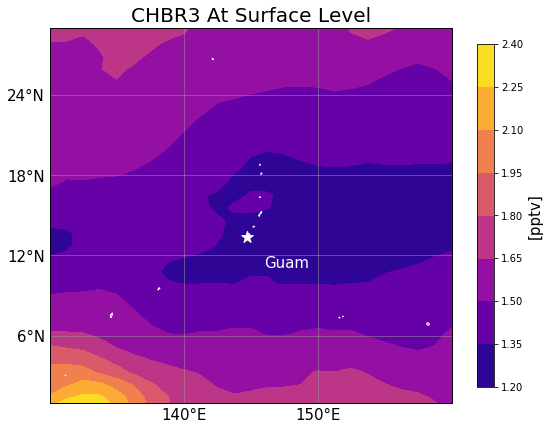

In [126]:
# get surface level, study area only 
# surface
surf = find_nearest(1000, cam['lev'])
ds_surf = cam.isel(lev = surf)

# test plot 
fig = plt.figure(figsize=(9, 9))

# ------------------------- CHBR3 
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
chbr3 = ds_surf['CHBR3'].squeeze()
chbr3 = chbr3*(1e12)
plt.contourf(chbr3.lon, chbr3.lat, chbr3, cmap = 'plasma')
ax.set_title('CHBR3 At Surface Level', fontsize=20)

ax.set_extent([130, 160, 1, 29], ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='w', linewidth=1)
gg = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='0.6', linestyle='-')
gg.xlocator = mticker.FixedLocator([130, 140, 150, 160, 170, 180])
gg.xlabels_top = False
gg.ylabels_right = False
gg.xformatter = LONGITUDE_FORMATTER
gg.yformatter = LATITUDE_FORMATTER
gg.xlabel_style = {'size': 15, 'color': 'k'}
gg.ylabel_style = {'size': 15, 'color': 'k'}

# get handle of colorbar so we can edit 
cbar = plt.colorbar(shrink = 0.7)
cbar.ax.set_ylabel('[pptv]', fontsize=15)

# add guam marker 
plt.scatter(144.7, 13.4, s = 150, c = 'w', marker = '*')
ax.text(144.7+3, 13.4-2, "Guam", c = 'w', ha="center", va="center", size=15)


In [ ]:
###################### STATISTICAL COMPARISON ######################

In [195]:
# camchem values near surface 
chbr3_bl = cam['CHBR3'].sel(lev = slice(700,1000))
cam_near_surf = chbr3_bl.values.flatten()*(1e12)

# toga values near surface
near_surf = np.where(toga.GGALT < 3500)
not_fill = np.where(toga.Bromoform > 0)
keep = np.intersect1d(near_surf, not_fill)
toga_near_surf = toga.Bromoform[keep]


Text(0, 0.5, 'Normalized Count')

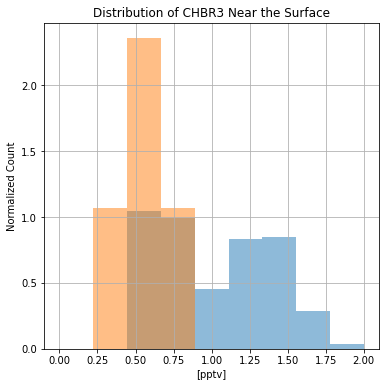

In [206]:
# plot 
bins = np.linspace(0, 2, 10)

fig, ax = plt.subplots(figsize=(6,6))
plt.hist(cam_near_surf, bins, alpha=0.5, density = True, label = 'CAMchem')
plt.hist(toga_near_surf, bins, alpha=0.5, density = True, label = 'TOGA')

ax.grid(which = 'major')
ax.set_title ('Distribution of CHBR3 Near the Surface')
ax.set_xlabel('[pptv]')
ax.set_ylabel('Normalized Count')

In [194]:
toga_near_surf

<xarray.DataArray 'Bromoform' (Time: 21)>
array([0.678, 0.539, 0.437, 0.671, 0.729, 0.848, 0.507, 0.332, 0.417, 0.637,
       0.782, 0.542, 0.617, 0.661, 0.387, 0.499, 0.421, 0.476, 0.517, 0.527,
       0.481], dtype=float32)
Coordinates:
  * Time     (Time) datetime64[ns] 2014-02-12T23:59:25 ... 2014-02-13T06:21:25
Attributes:
    units:         pptv
    long_name:     Bromoform
    actual_range:  [0.248 0.922]
    LLOD:          -888.0
    ULOD:          -777.0
    Category:      TOGA
    SerialNumber:  Unknown
    DataQuality:   Final

In [164]:
# p = p0*exp(-z/H)
# 700 hpa in km 
np.log(700/1000)*-10

3.5667494393873245